# Machine Learning: Application of Random Forrest to Machine Failure Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Machine_failure.csv to Machine_failure.csv


### Opening the dataset 

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Machine_failure.csv']))
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
# In order to work with the dataset, I decided to replace all the spaces with "_"
df.columns = [c.replace(' ', '_') for c in df.columns]
df.Machine_failure.value_counts()

0    9661
1     339
Name: Machine_failure, dtype: int64

#### *Now we want to clean the dataset:*

In [ ]:
for col in df.columns:
  print(col)

UDI
Product_ID
Type
Air_temperature_[K]
Process_temperature_[K]
Rotational_speed_[rpm]
Torque_[Nm]
Tool_wear_[min]
Machine_failure
TWF
HDF
PWF
OSF
RNF


In [ ]:
# Let's drop the columns that are not interesting for us
df_cleaned = df.drop(['Product_ID', 'UDI', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis = "columns")
df_cleaned

,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [ ]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() 
# Now we will encode the whole dataset using LabelEncoder

df_cleaned['Type'] = labelencoder.fit_transform(df_cleaned['Type'])
df_cleaned['Air_temperature_[K]'] = labelencoder.fit_transform(df_cleaned['Air_temperature_[K]'])
df_cleaned['Process_temperature_[K]'] = labelencoder.fit_transform(df_cleaned['Process_temperature_[K]'])
df_cleaned['Rotational_speed_[rpm]'] = labelencoder.fit_transform(df_cleaned['Rotational_speed_[rpm]'])
df_cleaned['Torque_[Nm]'] = labelencoder.fit_transform(df_cleaned['Torque_[Nm]'])
df_cleaned['Tool_wear_[min]'] = labelencoder.fit_transform(df_cleaned['Tool_wear_[min]'])
df_cleaned['Machine_failure'] = labelencoder.fit_transform(df_cleaned['Machine_failure'])


df_cleaned.head()

,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure
0,2,28,29,325,313,0,0
1,1,29,30,182,348,2,0
2,1,28,28,272,379,4,0
3,1,29,29,207,280,6,0
4,1,29,30,182,285,8,0


In [ ]:
# Now we will assign the cleaned encoded to df, and make a new dataframe where we will drop the column "Machine_failure", we will use this in the future for the Random Tree
df = df_cleaned
df_without_failure = df.drop(['Machine_failure'], axis = "columns")

In [ ]:
# Let's check the type of each column
frame_type = df.dtypes
frame_type

Type                       int64
Air_temperature_[K]        int64
Process_temperature_[K]    int64
Rotational_speed_[rpm]     int64
Torque_[Nm]                int64
Tool_wear_[min]            int64
Machine_failure            int64
dtype: object

#### *Let's start making the prediction model*

In [ ]:
from sklearn.model_selection import train_test_split
# Let's start by splitting arrays or mattrices into random train subsets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Machine_failure'], axis='columns'),df.Machine_failure,test_size=0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
model.score(X_test, y_test)
# We use model.score to see the prediction accuracy of our data by using x_test and comparing it to y_test

0.9995

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
# By using confusion_matrix we elevate the accuracy of classification
# Confusion matrix works well on binary models such as ours
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1932,    0],
       [   1,   67]])

In [ ]:
# If I understand it correctly, on the result above we see that the model found 155 "true negative" values, 19 "false positives", 25 "false negatives", and 63 "true positives".
# On the code below we will show this information on a heatmap.
# We can conclude that our model is pretty accurate when comparing the false negatives and positives with the true ones.

Text(87.0, 0.5, 'Truth')

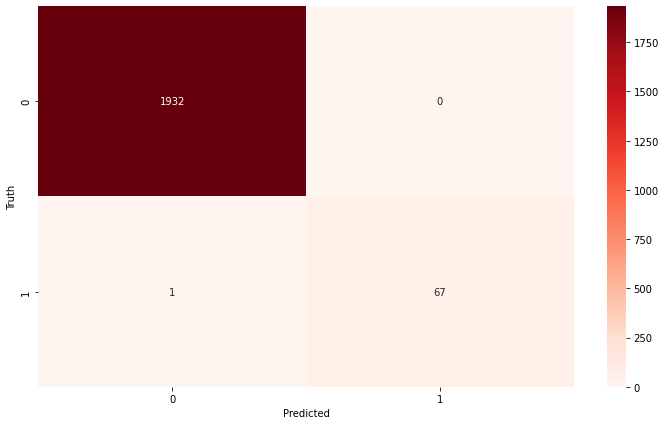

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(12,7))
sn.heatmap(cm, annot=True,cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# We will visualize cm

##### *Let's start building the Decision tree*

[Text(0.8194444444444444, 0.9615384615384616, 'X[8] <= 0.5\ngini = 0.068\nsamples = 5030\nvalue = [7716, 284]'),
 Text(0.7638888888888888, 0.8846153846153846, 'X[9] <= 0.5\ngini = 0.049\nsamples = 4983\nvalue = [7716, 201]'),
 Text(0.7083333333333334, 0.8076923076923077, 'X[7] <= 0.5\ngini = 0.03\nsamples = 4938\nvalue = [7716, 119]'),
 Text(0.6527777777777778, 0.7307692307692307, 'X[2] <= 79.5\ngini = 0.009\nsamples = 4885\nvalue = [7716, 36]'),
 Text(0.5138888888888888, 0.6538461538461539, 'X[5] <= 205.5\ngini = 0.009\nsamples = 4880\nvalue = [7712, 35]'),
 Text(0.4027777777777778, 0.5769230769230769, 'X[6] <= 0.5\ngini = 0.002\nsamples = 4690\nvalue = [7445, 8]'),
 Text(0.3472222222222222, 0.5, 'X[4] <= 361.5\ngini = 0.001\nsamples = 4688\nvalue = [7445, 5]'),
 Text(0.1111111111111111, 0.4230769230769231, 'X[3] <= 436.5\ngini = 0.0\nsamples = 3709\nvalue = [5886, 1]'),
 Text(0.05555555555555555, 0.34615384615384615, 'gini = 0.0\nsamples = 2895\nvalue = [4602, 0]'),
 Text(0.166666666

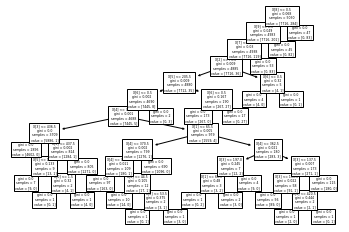

In [ ]:
from sklearn import tree
estimator = model.estimators_[5]
tree.plot_tree(estimator)

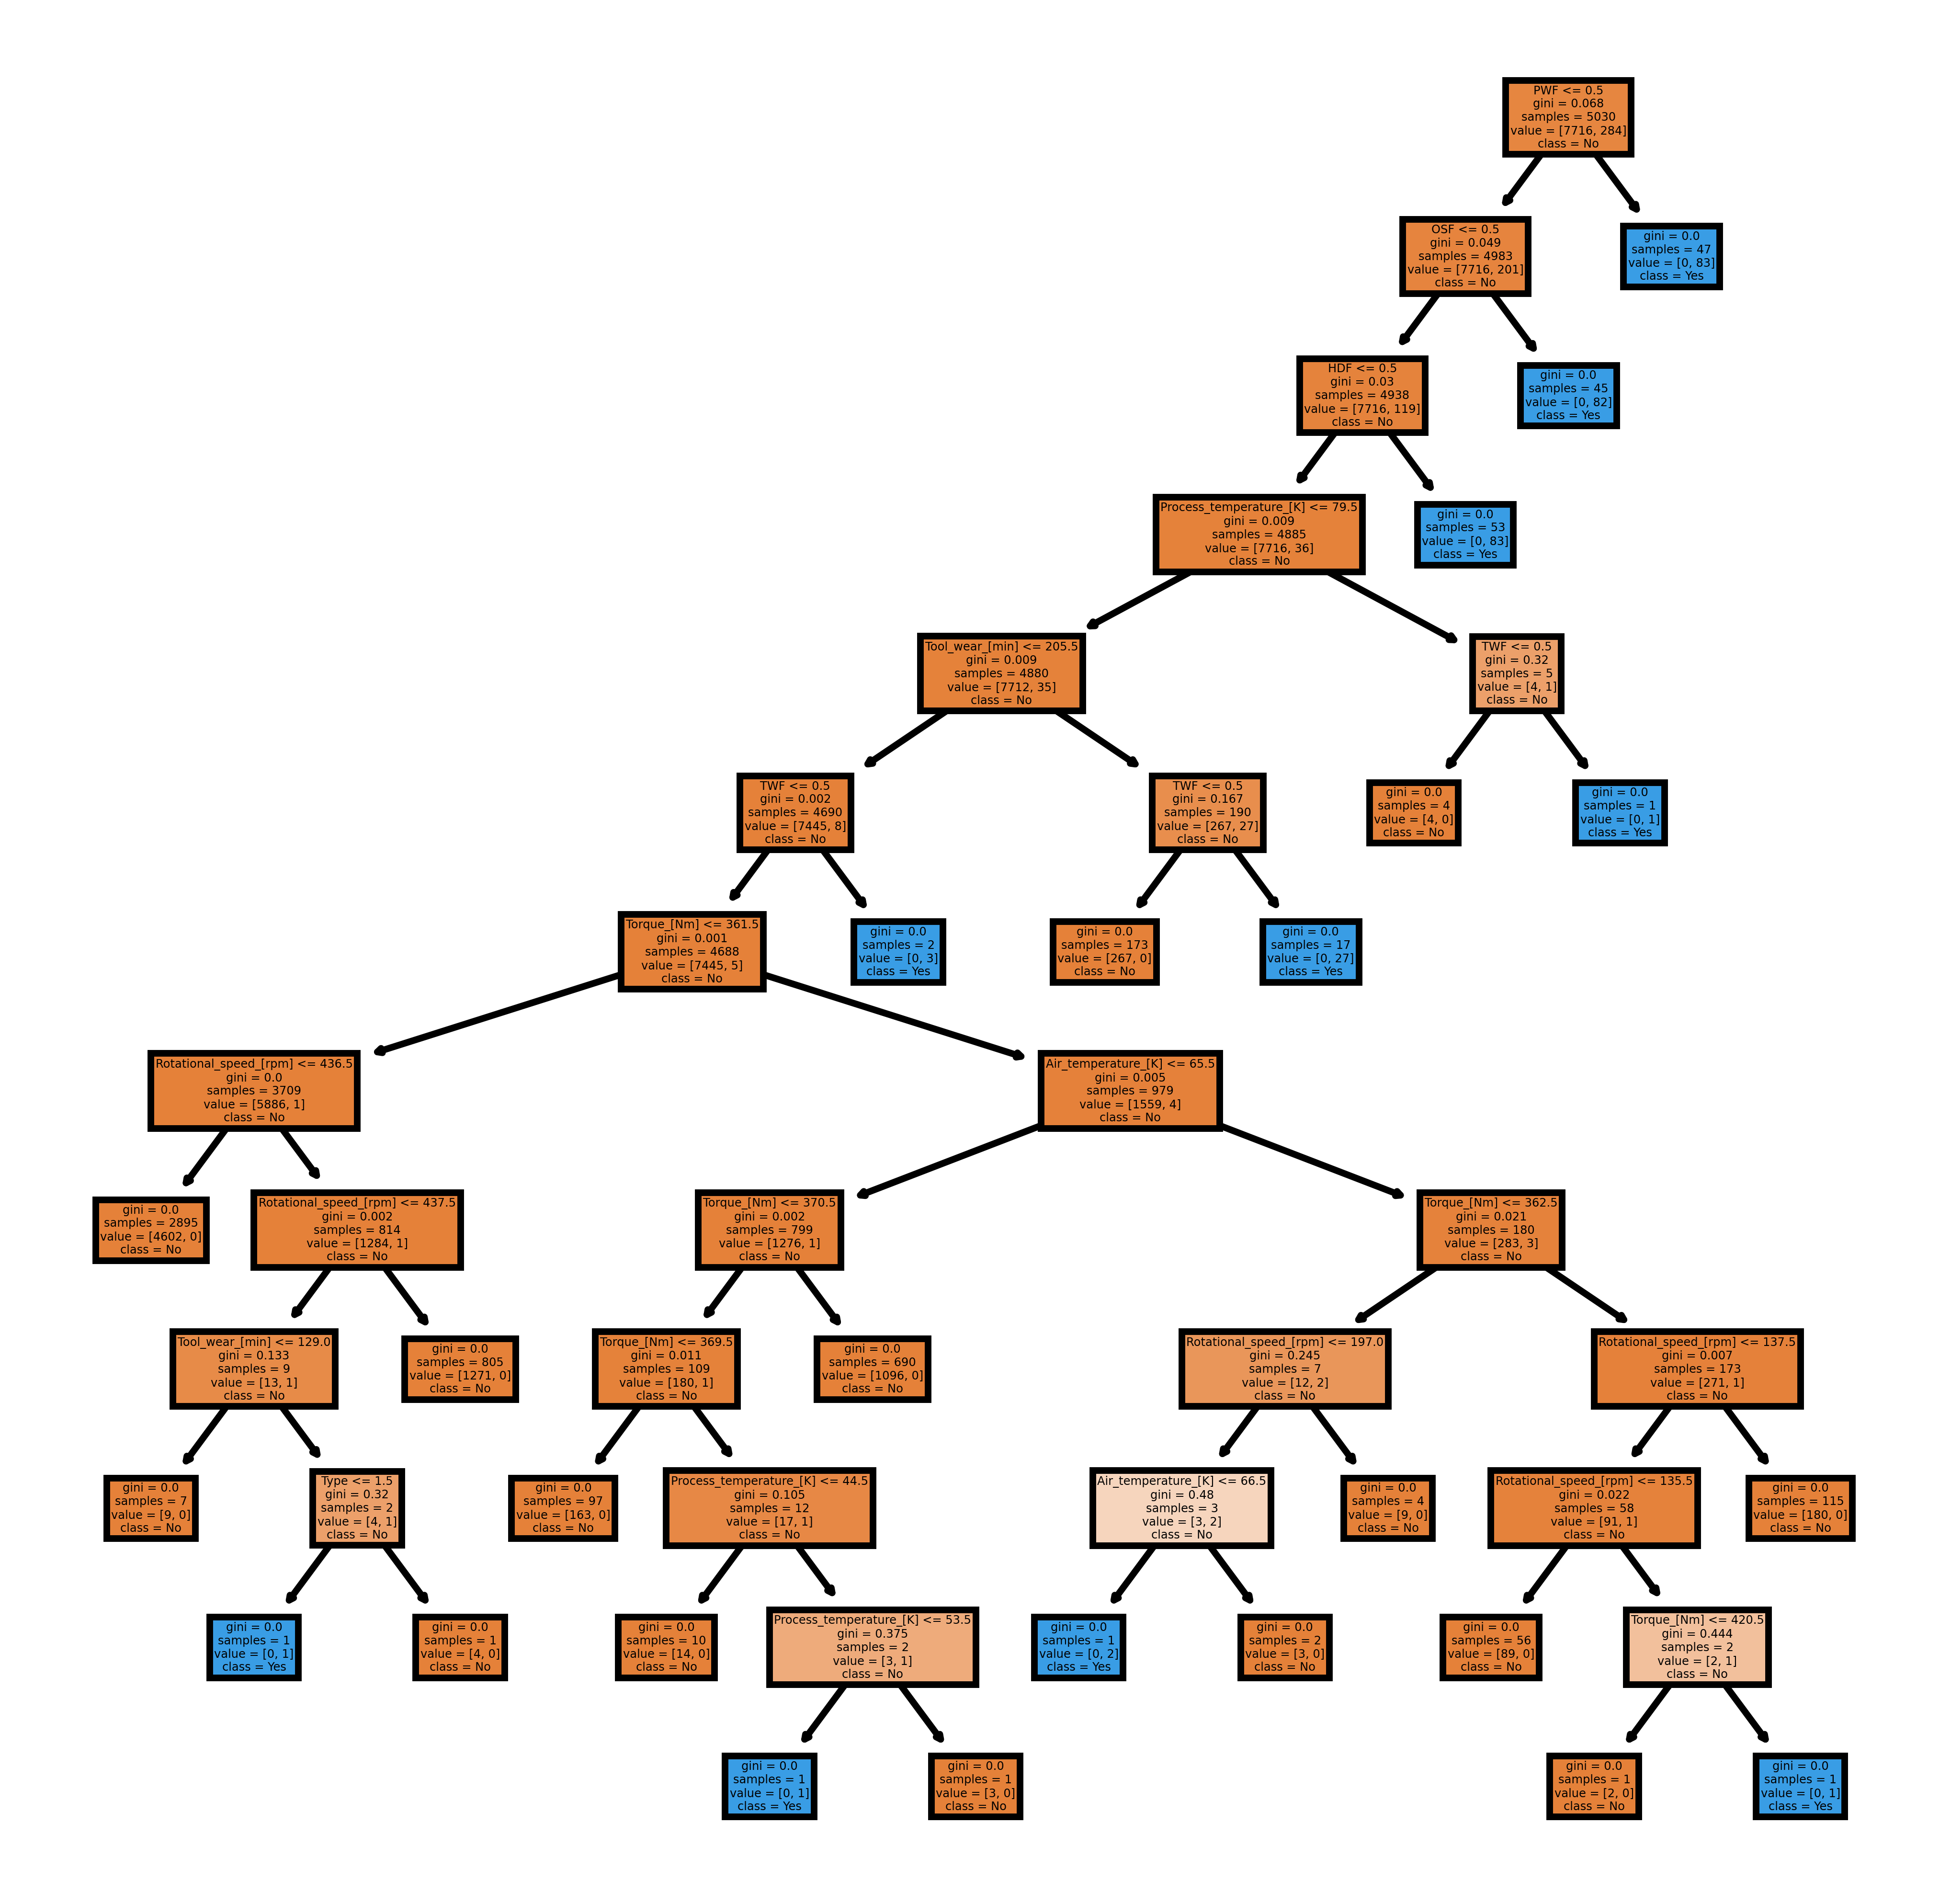

In [ ]:
# Let's visualize the decision tree from above

fn=df_without_failure.columns
cn=['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)
tree.plot_tree(estimator,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Machine_Failure_tree.png')

In [ ]:
from sklearn.tree import export_graphviz
import pydot
tree = model.estimators_[5]
feature_list=df_without_failure.columns


export_graphviz(tree, out_file = 'Mtree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('Mtree.dot')
graph.write_png('Machine_Failure_better.png')

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 202 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=bdb1c2a9dea2d63065421e18651dc492d4a0f53126d28d8080460bebf44eb147
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(estimator, X_train, y_train,
               target_name="Machine_failure",
               feature_names=fn,
               class_names=cn,
               title="Machine_failure")

viz.save("Machine_failure_tree_Titanic.svg")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


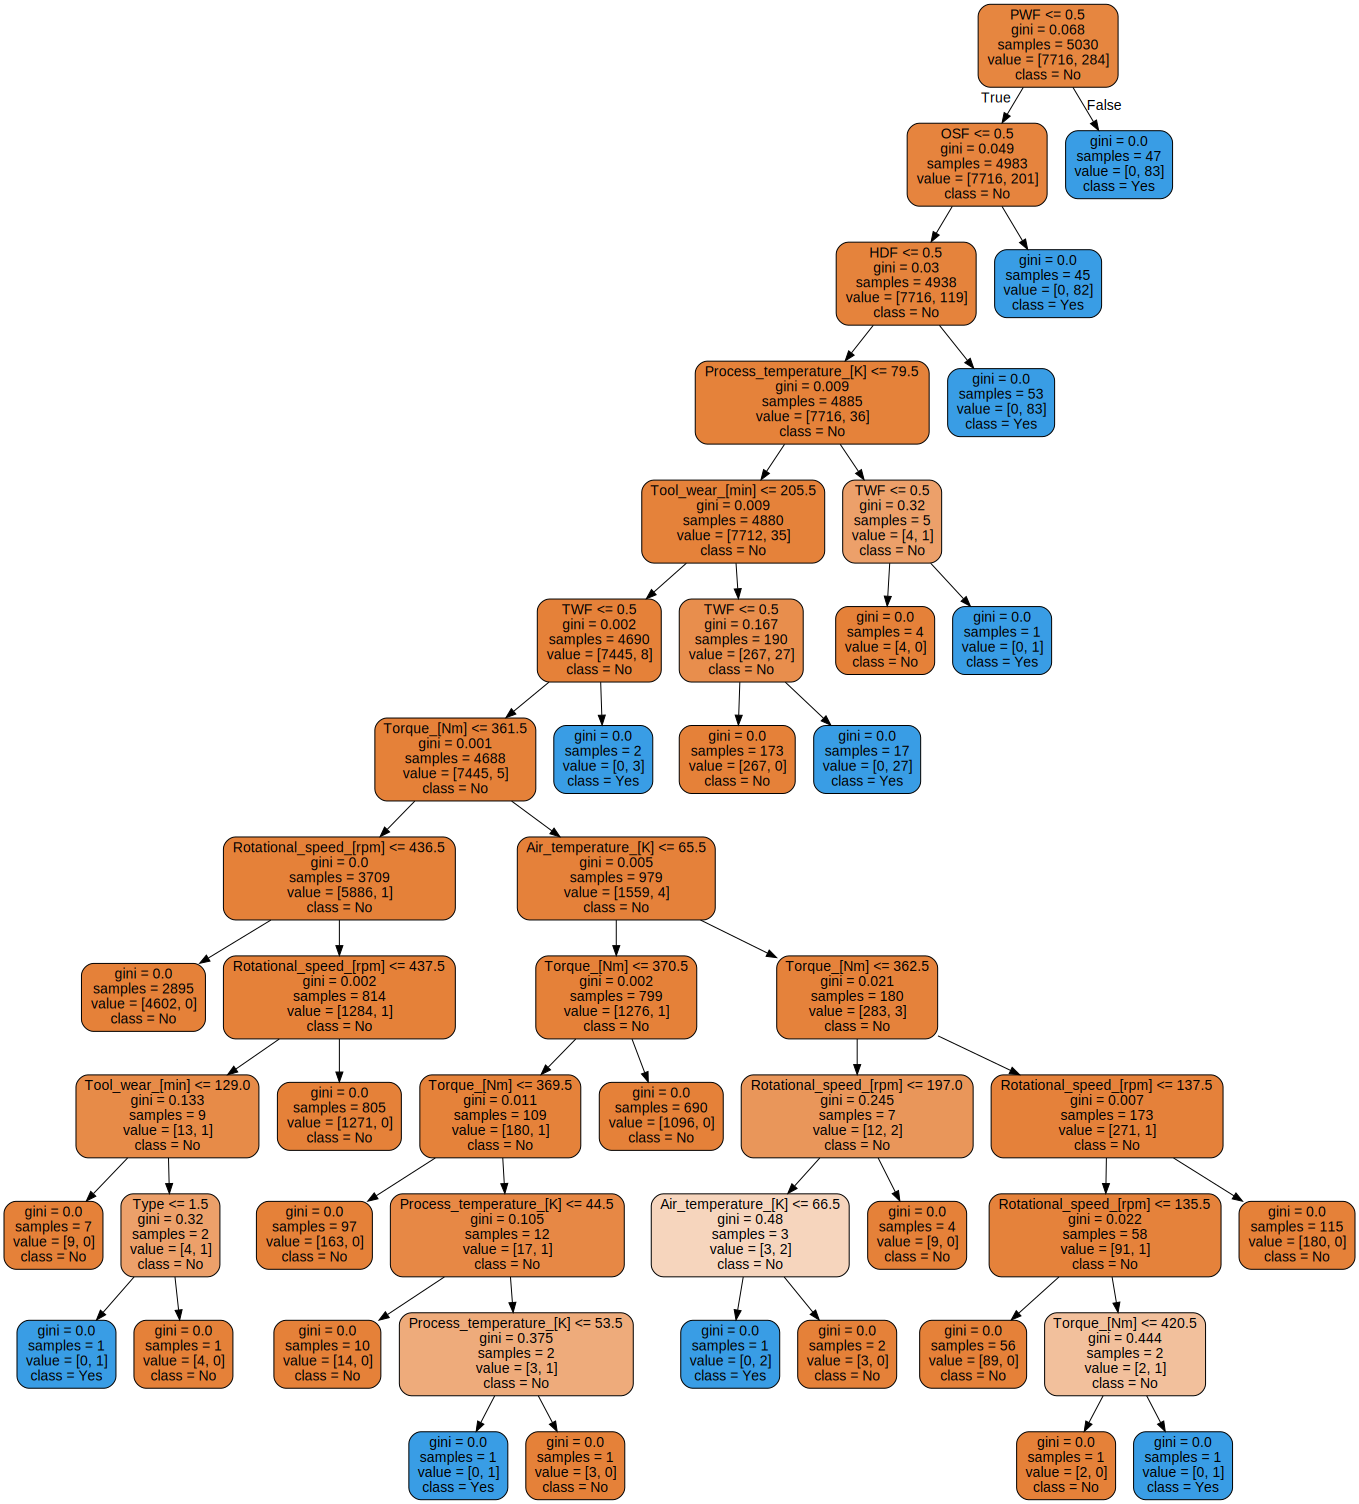

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(estimator, 
                           feature_names=fn,
                           class_names=cn, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

# Now we will open it better (the decision tree)